In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [47]:
df = pd.read_csv('PlayTennis.csv')

df.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [48]:
from sklearn.preprocessing import LabelEncoder

l1 = LabelEncoder()
l2 = LabelEncoder()
l3 = LabelEncoder()
l4 = LabelEncoder()

df['Outlook'] = l1.fit_transform(df['Outlook'])
df['Temperature'] = l2.fit_transform(df['Temperature'])
df['Humidity'] = l3.fit_transform(df['Humidity'])
df['Wind'] = l4.fit_transform(df['Wind'])


In [49]:
df.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2,1,0,1,No
1,2,1,0,0,No
2,0,1,0,1,Yes
3,1,2,0,1,Yes
4,1,0,1,1,Yes


In [50]:
X = df.drop('Play Tennis', axis=1)
y = df['Play Tennis']

In [51]:
pd.DataFrame(X)
pd.Series(y)

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: Play Tennis, dtype: object

In [52]:
X = df[['Outlook', 'Temperature', 'Humidity', 'Wind']]
y = df['Play Tennis']

In [53]:
print(type(X))
print(type(y))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<Axes: >

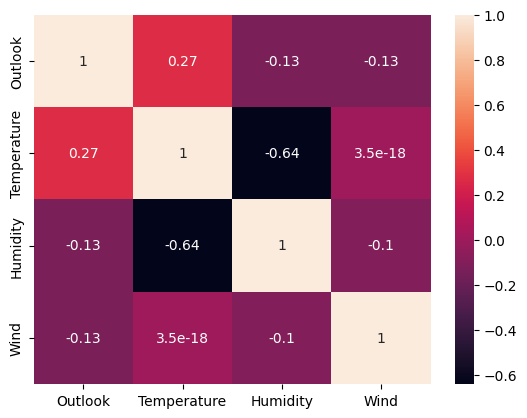

In [55]:
sns.heatmap(X_train.corr(), annot=True)

In [56]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='entropy')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(f"Accuracy: {accuracy_score(y_test, y_pred)*100}%")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}")
print(f"Classification Report: \n{classification_report(y_test, y_pred)}")

Accuracy: 100.0%
Confusion Matrix: 
[[1 0]
 [0 2]]
Classification Report: 
              precision    recall  f1-score   support

          No       1.00      1.00      1.00         1
         Yes       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [58]:
#Predicting for new data

# Outlook: Sunny, Temperature: Cool, Humidity: High, Wind: Strong

new_data = [[0, 1, 0, 1]]

print(f"Prediction: {clf.predict(new_data)[0]}")

Prediction: Yes
